### <center> This notebook is just for trying random stuff

In [70]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from airsea.windstress import stress

In [109]:
# Compute ekman transport along the coast
era5  = xr.open_dataset('data/HOVMOLLERS/ERA5_hovmoller_coastsouth_2000-2022.nc')
era5  = era5.sel(time=slice('2001','2011'))

f     = 2*np.sin(era5.lat*np.pi/180)*(2*np.pi/(24*3600))
ekman = era5.tauy/1025/f/3600 
ekman = ekman.swap_dims({'distance':'lat'}).sortby('lat').sel(lat=slice(-34,-25)).groupby('time.season').mean().sel(season='SON')

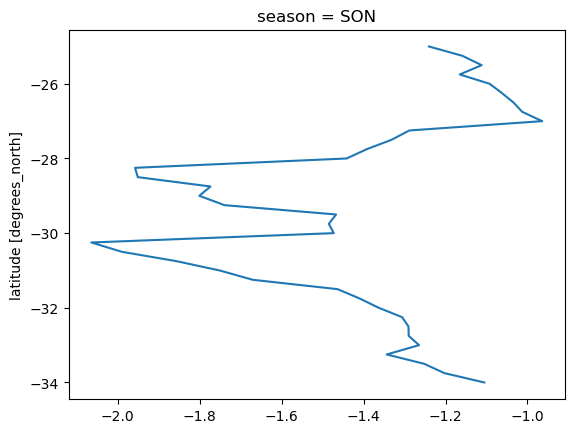

In [110]:
ekman.plot(y='lat')